In [1]:
#loading libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
#loading data
meteo_min = pd.read_csv('./data/meteo_min.csv', sep=',', header=0)

In [3]:
meteo_min.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
0,IDCJAC0011,87031,1943,1,1,NaN,NaN,NaN
1,IDCJAC0011,87031,1943,1,2,NaN,NaN,NaN
2,IDCJAC0011,87031,1943,1,3,NaN,NaN,NaN
3,IDCJAC0011,87031,1943,1,4,NaN,NaN,NaN
4,IDCJAC0011,87031,1943,1,5,NaN,NaN,NaN


In [4]:
#define the column names of the data
column_names = ['code', 'snumb', 'year', 'month', 'day', 'mint', 'durc', 'quality']
meteo_min.columns = column_names

In [5]:
#retrieve data of three attributes with indices 2,3,4,5
meteo_min = meteo_min.iloc[:, [2,3,4,5]]

In [6]:
meteo_min.head()

,year,month,day,mint
0,1943,1,1,NaN
1,1943,1,2,NaN
2,1943,1,3,NaN
3,1943,1,4,NaN
4,1943,1,5,NaN


In [7]:
#append a new attribute "date" to the data
meteo_min['date'] = [np.datetime64(dt.datetime(meteo_min.iloc[i,0],
                                  meteo_min.iloc[i, 1],
                                  meteo_min.iloc[i, 2]))
                    for i in range(0, len(meteo_min))]

In [8]:
meteo_min.head()

,year,month,day,mint,date
0,1943,1,1,NaN,1943-01-01
1,1943,1,2,NaN,1943-01-02
2,1943,1,3,NaN,1943-01-03
3,1943,1,4,NaN,1943-01-04
4,1943,1,5,NaN,1943-01-05


In [9]:
#select the data from 1968-7-1 to 2018-6-30
#define the start date as a datetime variable
start_date = dt.datetime(year = 1968, month = 7, day = 1)
#define the end date as a datetime variable
end_date = dt.datetime(year = 2018, month = 6, day = 30)
#the index of the start date in the meteo_min data
isd = meteo_min[meteo_min['date'] == np.datetime64(start_date)].index.item()
#the index of the end date in the meteo_min data
esd = meteo_min[meteo_min['date'] == np.datetime64(end_date)].index.item()
#retrieve the data during 1968-7-1 and 2018-6-30
temp_min = meteo_min.iloc[isd:esd + 1, [3,4]]
#set the index of the data with the date attribute
temp_min.index = temp_min.date

In [10]:
temp_min.head()

,mint,date
date,,
1968-07-01,1.6,1968-07-01
1968-07-02,2.3,1968-07-02
1968-07-03,5.0,1968-07-03
1968-07-04,7.6,1968-07-04
1968-07-05,8.4,1968-07-05


Text(0, 0.5, 'Minimum temperature $(^oC)$')

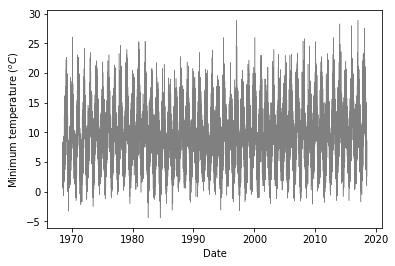

In [11]:
#plot the temporal change of the minimum temperature
fg = plt.figure()
plt.plot(temp_min.mint, lw = 0.5, color = 'gray')
plt.xlabel('Date')
plt.ylabel("Minimum temperature "r"$(^oC)$")

In [12]:
#check how many null values in this data
print('The number of null values is {0}'.format(sum(temp_min.mint.isna())))

The number of null values is 20


In [13]:
#get the indices of the null values in the data
na_index = temp_min.index[temp_min.mint.isna()]

In [14]:
na_index

DatetimeIndex(['1983-09-23', '1994-02-27', '1994-11-23', '1995-05-09',
               '1999-12-12', '2000-01-21', '2000-09-01', '2000-11-09',
               '2000-12-14', '2000-12-23', '2000-12-24', '2001-12-20',
               '2002-02-07', '2003-03-30', '2003-06-25', '2011-02-05',
               '2011-02-06', '2011-02-07', '2011-02-08', '2017-03-20'],
              dtype='datetime64[ns]', name='date', freq=None)

In [15]:
#which year has null values and how many of them in each year
na_index.year.value_counts()

2000    6
2011    4
2003    2
1994    2
1983    1
2002    1
2001    1
1999    1
1995    1
2017    1
Name: date, dtype: int64

In [16]:
#how many null values in the month that contains null values
na_index.month.value_counts()

2     6
12    5
11    2
9     2
3     2
6     1
5     1
1     1
Name: date, dtype: int64

In [17]:
#chose two examples
na_index_sub = na_index[[0, 16]]

In [18]:
na_index_sub

DatetimeIndex(['1983-09-23', '2011-02-06'], dtype='datetime64[ns]', name='date', freq=None)

In [19]:
#get a block of data that contains null values
mint_na_subs = []
for ech in na_index_sub:
    #start index of the block, changed to timestamp datatype
    vs_ei = dt.datetime.utcfromtimestamp(
        ech.timestamp() - 3600*24*5)
    #end index of the block, changed to timestamp datatype
    ve_ei = dt.datetime.utcfromtimestamp(
        ech.timestamp() + 3600*24*5)
    #min temperature in the range
    tmp = temp_min.mint[vs_ei:ve_ei]
    #append the data into mint_na_subs
    mint_na_subs.append(tmp)

In [20]:
#fill the missing values with the temperature of previous day
for i in range(0, len(mint_na_subs)):
    res = pd.DataFrame();
    data = mint_na_subs[i]
    filled_data = data.fillna(method = 'pad')
    print('----------------block #{0}----------------'.format(i))
    res['original_data'] = data
    res['filled_data'] = filled_data
    print(res)
    print()
    

----------------block #0----------------
            original_data  filled_data
date                                  
1983-09-18            4.6          4.6
1983-09-19           10.1         10.1
1983-09-20           11.0         11.0
1983-09-21            6.2          6.2
1983-09-22            5.2          5.2
1983-09-23            NaN          5.2
1983-09-24            5.2          5.2
1983-09-25            3.7          3.7
1983-09-26            0.9          0.9
1983-09-27            7.1          7.1
1983-09-28           13.9         13.9

----------------block #1----------------
            original_data  filled_data
date                                  
2011-02-01           21.8         21.8
2011-02-02           17.0         17.0
2011-02-03           17.4         17.4
2011-02-04           17.4         17.4
2011-02-05            NaN         17.4
2011-02-06            NaN         17.4
2011-02-07            NaN         17.4
2011-02-08            NaN         17.4
2011-02-09          

In [21]:
#fill the missing values with the temperature of next day
for i in range(0, len(mint_na_subs)):
    res = pd.DataFrame();
    data = mint_na_subs[i]
    filled_data = data.fillna(method = 'bfill')
    print('----------------block #{0}----------------'.format(i))
    res['original_data'] = data
    res['filled_data'] = filled_data
    print(res)
    print()

----------------block #0----------------
            original_data  filled_data
date                                  
1983-09-18            4.6          4.6
1983-09-19           10.1         10.1
1983-09-20           11.0         11.0
1983-09-21            6.2          6.2
1983-09-22            5.2          5.2
1983-09-23            NaN          5.2
1983-09-24            5.2          5.2
1983-09-25            3.7          3.7
1983-09-26            0.9          0.9
1983-09-27            7.1          7.1
1983-09-28           13.9         13.9

----------------block #1----------------
            original_data  filled_data
date                                  
2011-02-01           21.8         21.8
2011-02-02           17.0         17.0
2011-02-03           17.4         17.4
2011-02-04           17.4         17.4
2011-02-05            NaN         10.9
2011-02-06            NaN         10.9
2011-02-07            NaN         10.9
2011-02-08            NaN         10.9
2011-02-09          

In [22]:
#fill the missing values with the mean of the block data
for i in range(0, len(mint_na_subs)):
    res = pd.DataFrame();
    data = mint_na_subs[i]
    filled_data = data.fillna(data.mean())
    print('----------------block #{0}----------------'.format(i))
    res['original_data'] = data
    res['filled_data'] = filled_data
    print(res)
    print()


----------------block #0----------------
            original_data  filled_data
date                                  
1983-09-18            4.6         4.60
1983-09-19           10.1        10.10
1983-09-20           11.0        11.00
1983-09-21            6.2         6.20
1983-09-22            5.2         5.20
1983-09-23            NaN         6.79
1983-09-24            5.2         5.20
1983-09-25            3.7         3.70
1983-09-26            0.9         0.90
1983-09-27            7.1         7.10
1983-09-28           13.9        13.90

----------------block #1----------------
            original_data  filled_data
date                                  
2011-02-01           21.8         21.8
2011-02-02           17.0         17.0
2011-02-03           17.4         17.4
2011-02-04           17.4         17.4
2011-02-05            NaN         17.1
2011-02-06            NaN         17.1
2011-02-07            NaN         17.1
2011-02-08            NaN         17.1
2011-02-09          

In [23]:
#fill the missing values with the median of the block data
for i in range(0, len(mint_na_subs)):
    res = pd.DataFrame();
    data = mint_na_subs[i]
    filled_data = data.fillna(data.median())
    print('----------------block #{0}----------------'.format(i))
    res['original_data'] = data
    res['filled_data'] = filled_data
    print(res)
    print()

----------------block #0----------------
            original_data  filled_data
date                                  
1983-09-18            4.6          4.6
1983-09-19           10.1         10.1
1983-09-20           11.0         11.0
1983-09-21            6.2          6.2
1983-09-22            5.2          5.2
1983-09-23            NaN          5.7
1983-09-24            5.2          5.2
1983-09-25            3.7          3.7
1983-09-26            0.9          0.9
1983-09-27            7.1          7.1
1983-09-28           13.9         13.9

----------------block #1----------------
            original_data  filled_data
date                                  
2011-02-01           21.8         21.8
2011-02-02           17.0         17.0
2011-02-03           17.4         17.4
2011-02-04           17.4         17.4
2011-02-05            NaN         17.4
2011-02-06            NaN         17.4
2011-02-07            NaN         17.4
2011-02-08            NaN         17.4
2011-02-09          

----------------block #0----------------
              od  fd_m1  fd_m2  fd_m3  fd_m4  fd_m5
date                                               
1983-09-18   4.6    4.6    4.6    4.6    4.6    4.6
1983-09-19  10.1   10.1   10.1   10.1   10.1   10.1
1983-09-20  11.0   11.0   11.0   11.0   11.0   11.0
1983-09-21   6.2    6.2    6.2    6.2    6.2    6.2
1983-09-22   5.2    5.2    5.2    5.2    5.2    5.2
1983-09-23   NaN    5.2    5.2    5.2    5.4    5.2
1983-09-24   5.2    5.2    5.2    5.2    5.2    5.2
1983-09-25   3.7    3.7    3.7    3.7    3.7    3.7
1983-09-26   0.9    0.9    0.9    0.9    0.9    0.9
1983-09-27   7.1    7.1    7.1    7.1    7.1    7.1
1983-09-28  13.9   13.9   13.9   13.9   13.9   13.9

----------------block #1----------------
              od  fd_m1  fd_m2  fd_m3  fd_m4  fd_m5
date                                               
2011-02-01  21.8   21.8   21.8   21.8   21.8   21.8
2011-02-02  17.0   17.0   17.0   17.0   17.0   17.0
2011-02-03  17.4   17.4   17.4   

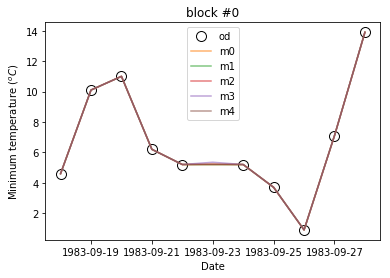

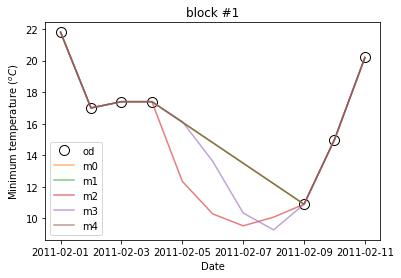

In [24]:
#filling the missing values with interpolation function
for i in range(0, len(mint_na_subs)):
    res = pd.DataFrame();
    data = mint_na_subs[i]
    filled_data_0 = data.interpolate()
    filled_data_1 = data.interpolate(method = 'time')
    filled_data_2 = data.interpolate(method = 'spline', order=2)
    filled_data_3 = data.interpolate(method = 'polynomial', order = 2)
    filled_data_4 = data.interpolate(limit_direction = 'both')
    print('----------------block #{0}----------------'.format(i))
    res['od'] = data
    res['fd_m1'] = np.round(filled_data_0,1)
    res['fd_m2'] = filled_data_1
    res['fd_m3'] = np.round(filled_data_2,1)
    res['fd_m4'] = np.round(filled_data_3,1)
    res['fd_m5'] = filled_data_4
    print(res)
    print()
    fg = plt.figure()
    plt.plot(data, 'o', markeredgecolor='black', markerfacecolor="None", markersize=10)
    plt.plot(filled_data_0, alpha = 0.6)
    plt.plot(filled_data_1, alpha = 0.6)
    plt.plot(filled_data_2, alpha = 0.6)
    plt.plot(filled_data_3, alpha = 0.6)
    plt.plot(filled_data_4, alpha = 0.6)
    plt.legend(['od', 'm0', 'm1','m2','m3','m4'])
    plt.xlabel('Date')
    plt.ylabel("Minimum temperature "r"$(^oC)$")
    plt.title('block #{0}'.format(i))
    

In [25]:
#fill missing values based on a reference year
na_index_sub_exp = na_index_sub[1]


In [26]:
#get a block of data that contains null values
#start index of the block, changed to timestamp datatype
vs_ei = dt.datetime.utcfromtimestamp(
    na_index_sub_exp.timestamp() - 3600*24*15)
#end index of the block, changed to timestamp datatype
ve_ei = dt.datetime.utcfromtimestamp(
    na_index_sub_exp.timestamp() + 3600*24*15)
#min temperature in the range
data = temp_min.mint[vs_ei:ve_ei]

In [27]:
#get a block of data from a reference year with the same time periods
syear = 2010
eyear = 2010
smonth = data.index[0].month
sday = data.index[0].day
emonth = data.index[-1].month
eday = data.index[-1].day
s_ei = dt.datetime(syear, smonth, sday)
e_ei = dt.datetime(eyear, emonth, eday)
ref_data = temp_min.mint[s_ei:e_ei]

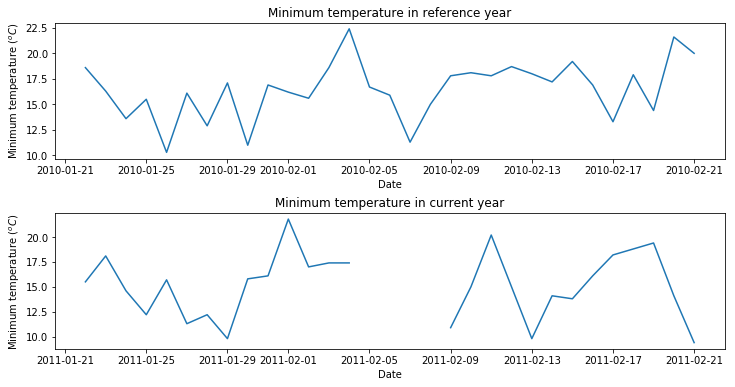

In [28]:
#have a look at the data from different source
fg = plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(ref_data)
plt.xlabel('Date')
plt.ylabel("Minimum temperature "r"$(^oC)$")
plt.title('Minimum temperature in reference year')

plt.subplot(2,1,2)
plt.plot(data)
plt.xlabel('Date')
plt.ylabel("Minimum temperature "r"$(^oC)$")
plt.title('Minimum temperature in current year')

plt.subplots_adjust(hspace=0.4)

In [29]:
#combine the data from both years
comb_data = pd.DataFrame({"ref":ref_data.values, "cur":data.values})

In [30]:
#a short view of the data
comb_data.head(10)

,ref,cur
0,18.6,15.5
1,16.3,18.1
2,13.6,14.6
3,15.5,12.2
4,10.3,15.7
5,16.1,11.3
6,12.9,12.2
7,17.1,9.8
8,11.0,15.8
9,16.9,16.1


In [31]:
#descriptive statistic of the data
comb_data.describe()

,ref,cur
count,31.000000,27.000000
mean,16.480645,15.174074
std,2.839181,3.283243
min,10.300000,9.400000
25%,15.250000,13.000000
50%,16.900000,15.500000
75%,18.050000,17.400000
max,22.400000,21.800000


Mean ratio is 1.167


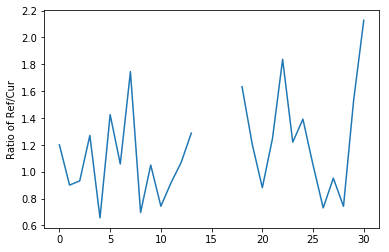

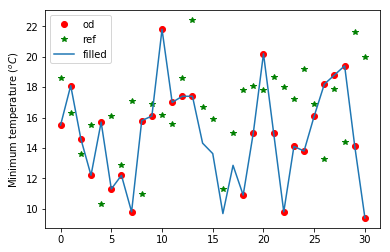

In [32]:
#filling the missing values based on the mean ratio of ref and cur
#get the ratios
ratios = comb_data['ref']/comb_data['cur']

#plot the ratios
fg = plt.figure()
plt.plot(ratios)
plt.ylabel('Ratio of Ref/Cur')

#calculate mean ratios
mratio = ratios.mean()
print('Mean ratio is {0:.3f}'.format(mratio))

#filling the missing values with the products of mean ratio and corresponding values in reference year
filled_data = data.where(pd.notna(data), comb_data.ref.values/mratio)

#compare the original data and filled data
fg = plt.figure()
plt.plot(data.values, 'ro')
plt.plot(ref_data.values,'g*')
plt.plot(filled_data.values)
plt.ylabel("Minimum temperature "r"$(^oC)$")
plt.legend(['od', 'ref', 'filled'])

In [33]:
new_data = pd.DataFrame({"original": data, "filled":filled_data})

In [34]:
print(new_data.iloc[10:20,:])

            original     filled
date                           
2011-02-01      21.8  21.800000
2011-02-02      17.0  17.000000
2011-02-03      17.4  17.400000
2011-02-04      17.4  17.400000
2011-02-05       NaN  14.314962
2011-02-06       NaN  13.629216
2011-02-07       NaN   9.686172
2011-02-08       NaN  12.857751
2011-02-09      10.9  10.900000
2011-02-10      15.0  15.000000
